> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (noshowappointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project, I will deal with noshowappointments dataset by exploring the dataset , cleaning it, and analyze it.
This project contains many features and my rule as a data analyst to find the most important features which will affect  people’s decision (attending the appointments)
In this project, I will use the strategies and the knowledge which we were earned.



In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [11]:

appo_df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
appo_df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
appo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


-----------------------
**there is no null data !!** 

**let's celeberate XD**

In [13]:
appo_df.shape

(110527, 14)

In [14]:
appo_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>**note** : to be cleaned  
min value in the is Age is -1 

#### I think he is Michael Kahnwald from **Dark** series XD

-----------------------------------
now

let's check unique values in the PatientId column 

In [15]:
print(type(appo_df['PatientId'][0]))
appo_df['PatientId'] = appo_df['PatientId'].astype(str);
print(len(appo_df['PatientId'].unique()))
print(type(appo_df['PatientId'][0]))


<class 'numpy.float64'>
62299
<class 'str'>


62299 patients have visited the hospitals

that means most of them have visited the hospital at least two times 


In [16]:
len(appo_df['AppointmentID'].unique())


110527

no repeated raws

>Age (logic issue)  

>Handcap rearange it  
>add needed raws 
### Data Cleaning 

the age less than 0 is not acceptable 

so we will clean delete this raw 

In [17]:
appo_df[appo_df['Age']<0]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.65943158731e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [18]:
update_appo_df=appo_df.drop(appo_df.index[99832])

In [19]:
#appo_df.drop(appo_df['Age']=='5775010',inplace=True)
update_appo_df[update_appo_df['Age']<0]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [20]:
update_appo_df['AppointmentID'].duplicated().values.any()

False

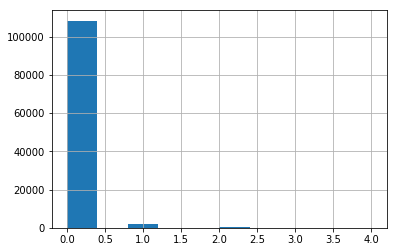

In [21]:
update_appo_df['Handcap'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ef96d0198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1ef743d7f0>]], dtype=object)

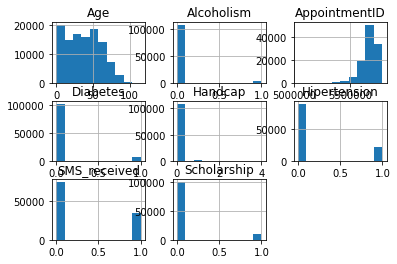

In [22]:
update_appo_df.hist()

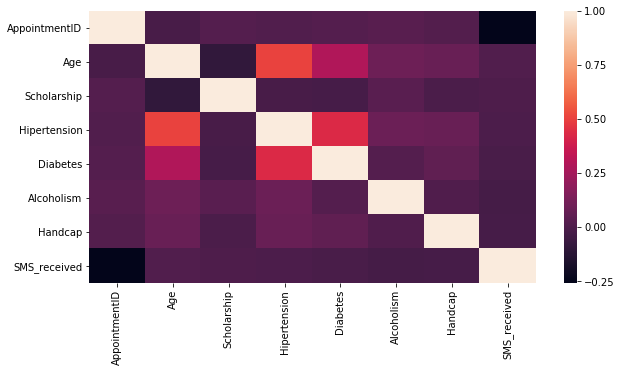

In [23]:
plt.figure(figsize=(10,5))
sns.heatmap(update_appo_df.corr());

Handcap is quite confusing 

I think we should use it as a 2 level to discribe the Handcap as the max is 1

so  
0:0.5 will be low

.>0.5 will be high 
 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


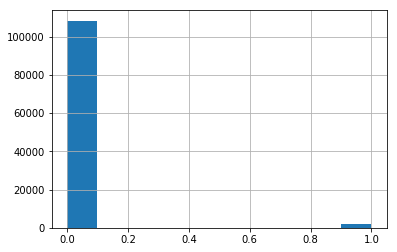

In [24]:
update_appo_df['Handcap'][update_appo_df['Handcap']>0.5]=1
update_appo_df['Handcap'].hist();

### num_waiting_days

In [25]:
#update_appo_df['ScheduledDay']
update_appo_df['ScheduledDay'] = pd.to_datetime(update_appo_df.ScheduledDay)
update_appo_df['AppointmentDay'] = pd.to_datetime(update_appo_df.AppointmentDay)
update_appo_df['ScheduledDay'] = update_appo_df.ScheduledDay.dt.normalize()



In [26]:
update_appo_df['WaitingDays'] = update_appo_df['AppointmentDay'] - update_appo_df['ScheduledDay']


In [27]:
update_appo_df['WaitingDays'].describe()

count                     110526
mean     10 days 04:24:39.789370
std      15 days 06:07:14.979140
min            -6 days +00:00:00
25%              0 days 00:00:00
50%              4 days 00:00:00
75%             15 days 00:00:00
max            179 days 00:00:00
Name: WaitingDays, dtype: object

>the min num is -6 !!                                                                                                           
 he set the day after attendance                                                                                                
 Dark s4 !!
 
 let's drop some rows 



In [28]:
len(update_appo_df['WaitingDays'][update_appo_df['WaitingDays']<pd.tslib.Timedelta('0 day')])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timedelta as pandas.Timedelta
  """Entry point for launching an IPython kernel.


5

In [29]:
update_appo_df[update_appo_df['WaitingDays']<pd.tslib.Timedelta('0 day')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays
27033,7.83927266175e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1 days
55226,7.89629396787e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1 days
64175,2.425225839e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1 days
71533,9.98231581612e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6 days
72362,3.78748196682e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1 days


In [30]:
drop_index = update_appo_df[update_appo_df['WaitingDays'] < pd.tslib.Timedelta('0 day')].index
update_appo_df.drop(drop_index, inplace=True)
update_appo_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays
0,2.98724998243e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
1,5.58997776694e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days
2,4.26296229995e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days
4,8.84118644818e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days


In [31]:
update_appo_df['WaitingDays'] = update_appo_df.WaitingDays.dt.days 

In [32]:
update_appo_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays
0,2.98724998243e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.58997776694e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.26296229995e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.84118644818e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


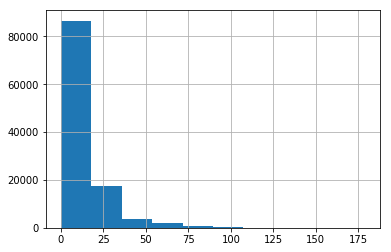

In [33]:
update_appo_df['WaitingDays'].hist();

I will focus on the 

- 0 is the same day
- 1:3 is a short 
- 4:7 is a week 
- 8:15 is a half_month
- 16:30 a month 
- 31:60 2 months
- 61:70 long 
- 71: very long 

In [34]:
desc=['same_day','short_1:3','week_4:7','8:15_half_month','16:30_month','31:60_2_months','61:70_long','71:_very long']
start_1=[0,1,4,8,16,31,61,71]
end_point=[0,3,7,15,30,60,70,1000]
update_appo_df['WaitingDays_names']=update_appo_df['WaitingDays']
for i in range(8):
    print(start_1[i], end_point[i],' ',desc[i])
    update_appo_df['WaitingDays_names'][(update_appo_df['WaitingDays'] <= end_point[i]) & (update_appo_df['WaitingDays'] >=start_1[i])]=desc[i]

update_appo_df.head()


0 0   same_day
1 3   short_1:3
4 7   week_4:7


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


8 15   8:15_half_month
16 30   16:30_month
31 60   31:60_2_months
61 70   61:70_long
71 1000   71:_very long


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays,WaitingDays_names
0,2.98724998243e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,same_day
1,5.58997776694e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,same_day
2,4.26296229995e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,same_day
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,same_day
4,8.84118644818e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,same_day


In [35]:
update_appo_df.WaitingDays_names.unique()


array(['same_day', 'short_1:3', 'week_4:7', '8:15_half_month',
       '16:30_month', '31:60_2_months', '61:70_long', '71:_very long'], dtype=object)

## Handcap


In [43]:
results = update_appo_df.groupby(by=['Handcap','No-show'])
results = results.count()['PatientId'].unstack()

results


No-show,No,Yes
Handcap,,
0,86373,21909
1,1834,405


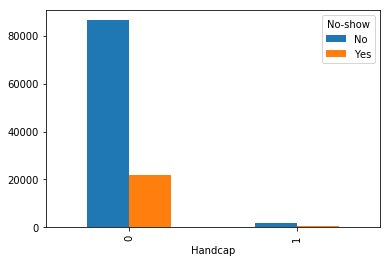

In [44]:
results.plot.bar()

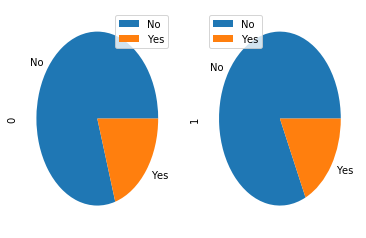

In [45]:
axes = results.T.plot.pie(rot=0, subplots=True)
axes[1].legend(loc=2)  

In [39]:
result_2 = update_appo_df.groupby(by=['WaitingDays_names','No-show'])
result_2 = result_2.count()['PatientId'].unstack()

result_2

No-show,No,Yes
WaitingDays_names,,
16:30_month,10709,5159
31:60_2_months,5454,2829
61:70_long,872,340
71:_very long,627,256
8:15_half_month,9362,4166
same_day,36770,1792
short_1:3,11316,3359
week_4:7,13097,4413


In [42]:
result_2.describe()

No-show,No,Yes
count,8.000000,8.000000
mean,11025.875000,2789.250000
std,11416.067392,1847.183319
min,627.000000,256.000000
25%,4308.500000,1429.000000
50%,10035.500000,3094.000000
75%,11761.250000,4227.750000
max,36770.000000,5159.000000


10709
5159
5454
2829
872
340
627
256
9362
4166
36770
1792
11316
3359
13097
4413


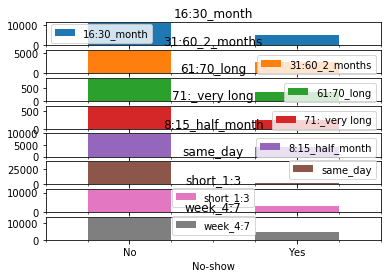

In [40]:
for y in result_2.T:
    for r in result_2.T[y]:
        print(r)
axes = result_2.T.plot.bar(rot=0, subplots=True)
axes[0].legend(loc=6)  

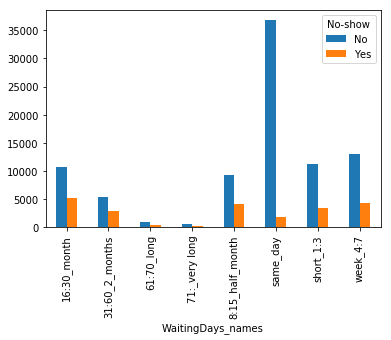

In [41]:
result_2.plot.bar()

## Gender

In [53]:
result_gender = update_appo_df.groupby(by=['Gender','No-show'])
result_gender = result_gender.count()['PatientId'].unstack()

result_gender

No-show,No,Yes
Gender,,
F,57245,14591
M,30962,7723


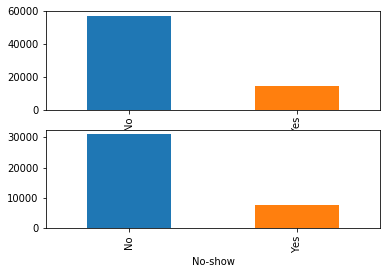

In [54]:
result_gender_T=result_gender.T
fig, axes = plt.subplots(2)
result_gender_T['F'].plot.bar(ax=axes[0])
result_gender_T['M'].plot.bar(ax=axes[1])



### Neighborhood_names

In [55]:
result_Neighbourhood = update_appo_df.groupby(by=['Neighbourhood','No-show'])
result_Neighbourhood = result_Neighbourhood.count()['PatientId'].unstack()

result_Neighbourhood.head()

No-show,No,Yes
Neighbourhood,,
AEROPORTO,7.0,1.0
ANDORINHAS,1741.0,521.0
ANTÔNIO HONÓRIO,221.0,50.0
ARIOVALDO FAVALESSA,220.0,62.0
BARRO VERMELHO,332.0,91.0


In [56]:
result_Neighbourhood.describe()

No-show,No,Yes
count,80.00000,80.000000
mean,1102.58750,278.925000
std,1096.25939,277.942202
min,1.00000,1.000000
25%,324.00000,75.000000
50%,709.50000,184.500000
75%,1605.00000,428.250000
max,6252.00000,1465.000000


In [57]:
result_Neighbourhood[result_Neighbourhood['No']==1]

No-show,No,Yes
Neighbourhood,,
PARQUE INDUSTRIAL,1.0,NaN


In [58]:
result_Neighbourhood.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, AEROPORTO to VILA RUBIM
Data columns (total 2 columns):
No     80 non-null float64
Yes    80 non-null float64
dtypes: float64(2)
memory usage: 1.9+ KB


In [59]:
result_Neighbourhood.isnull().values.any()

True

In [60]:
result_Neighbourhood.T['PARQUE INDUSTRIAL']

No-show
No     1.0
Yes    NaN
Name: PARQUE INDUSTRIAL, dtype: float64

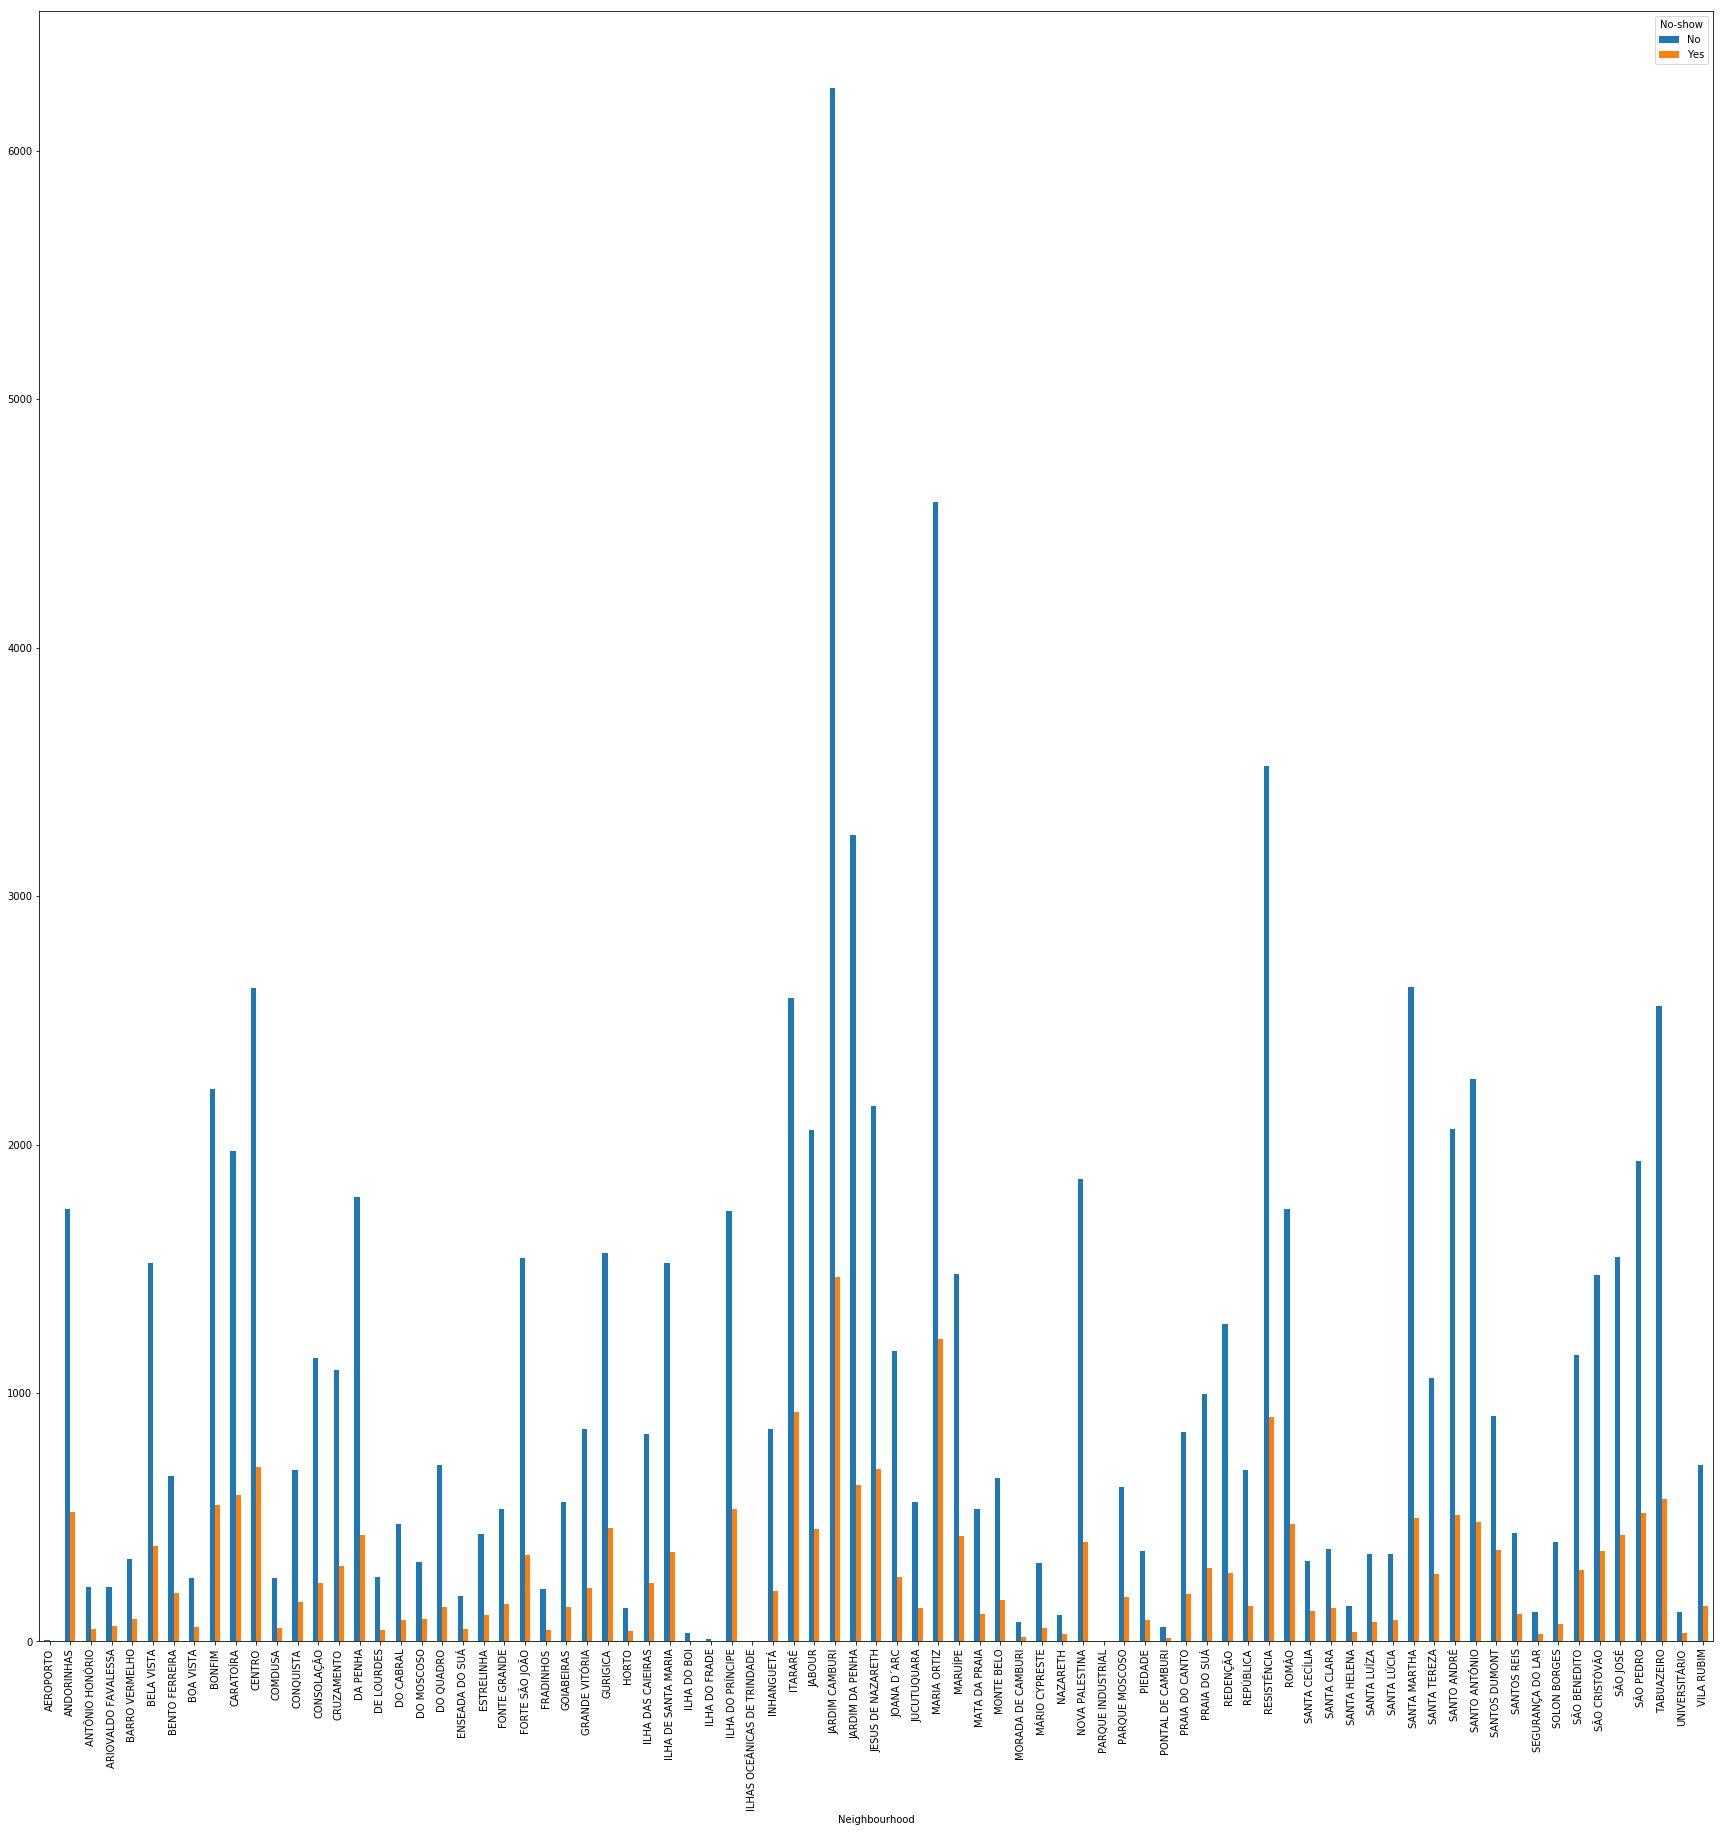

In [61]:
result_Neighbourhood.plot.bar(figsize=(30,30))

### age

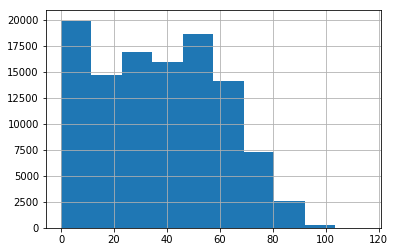

In [62]:
update_appo_df['Age'].hist()

In [63]:

result_Age = update_appo_df.groupby(by=['Age','No-show'])
result_Age = result_Age.count()['PatientId'].unstack()

result_Age.head()

No-show,No,Yes
Age,,
0,2900.0,639.0
1,1858.0,415.0
2,1366.0,252.0
3,1236.0,277.0
4,1017.0,282.0


In [64]:
m=result_Age['No']/(result_Age['Yes']+result_Age['No'])

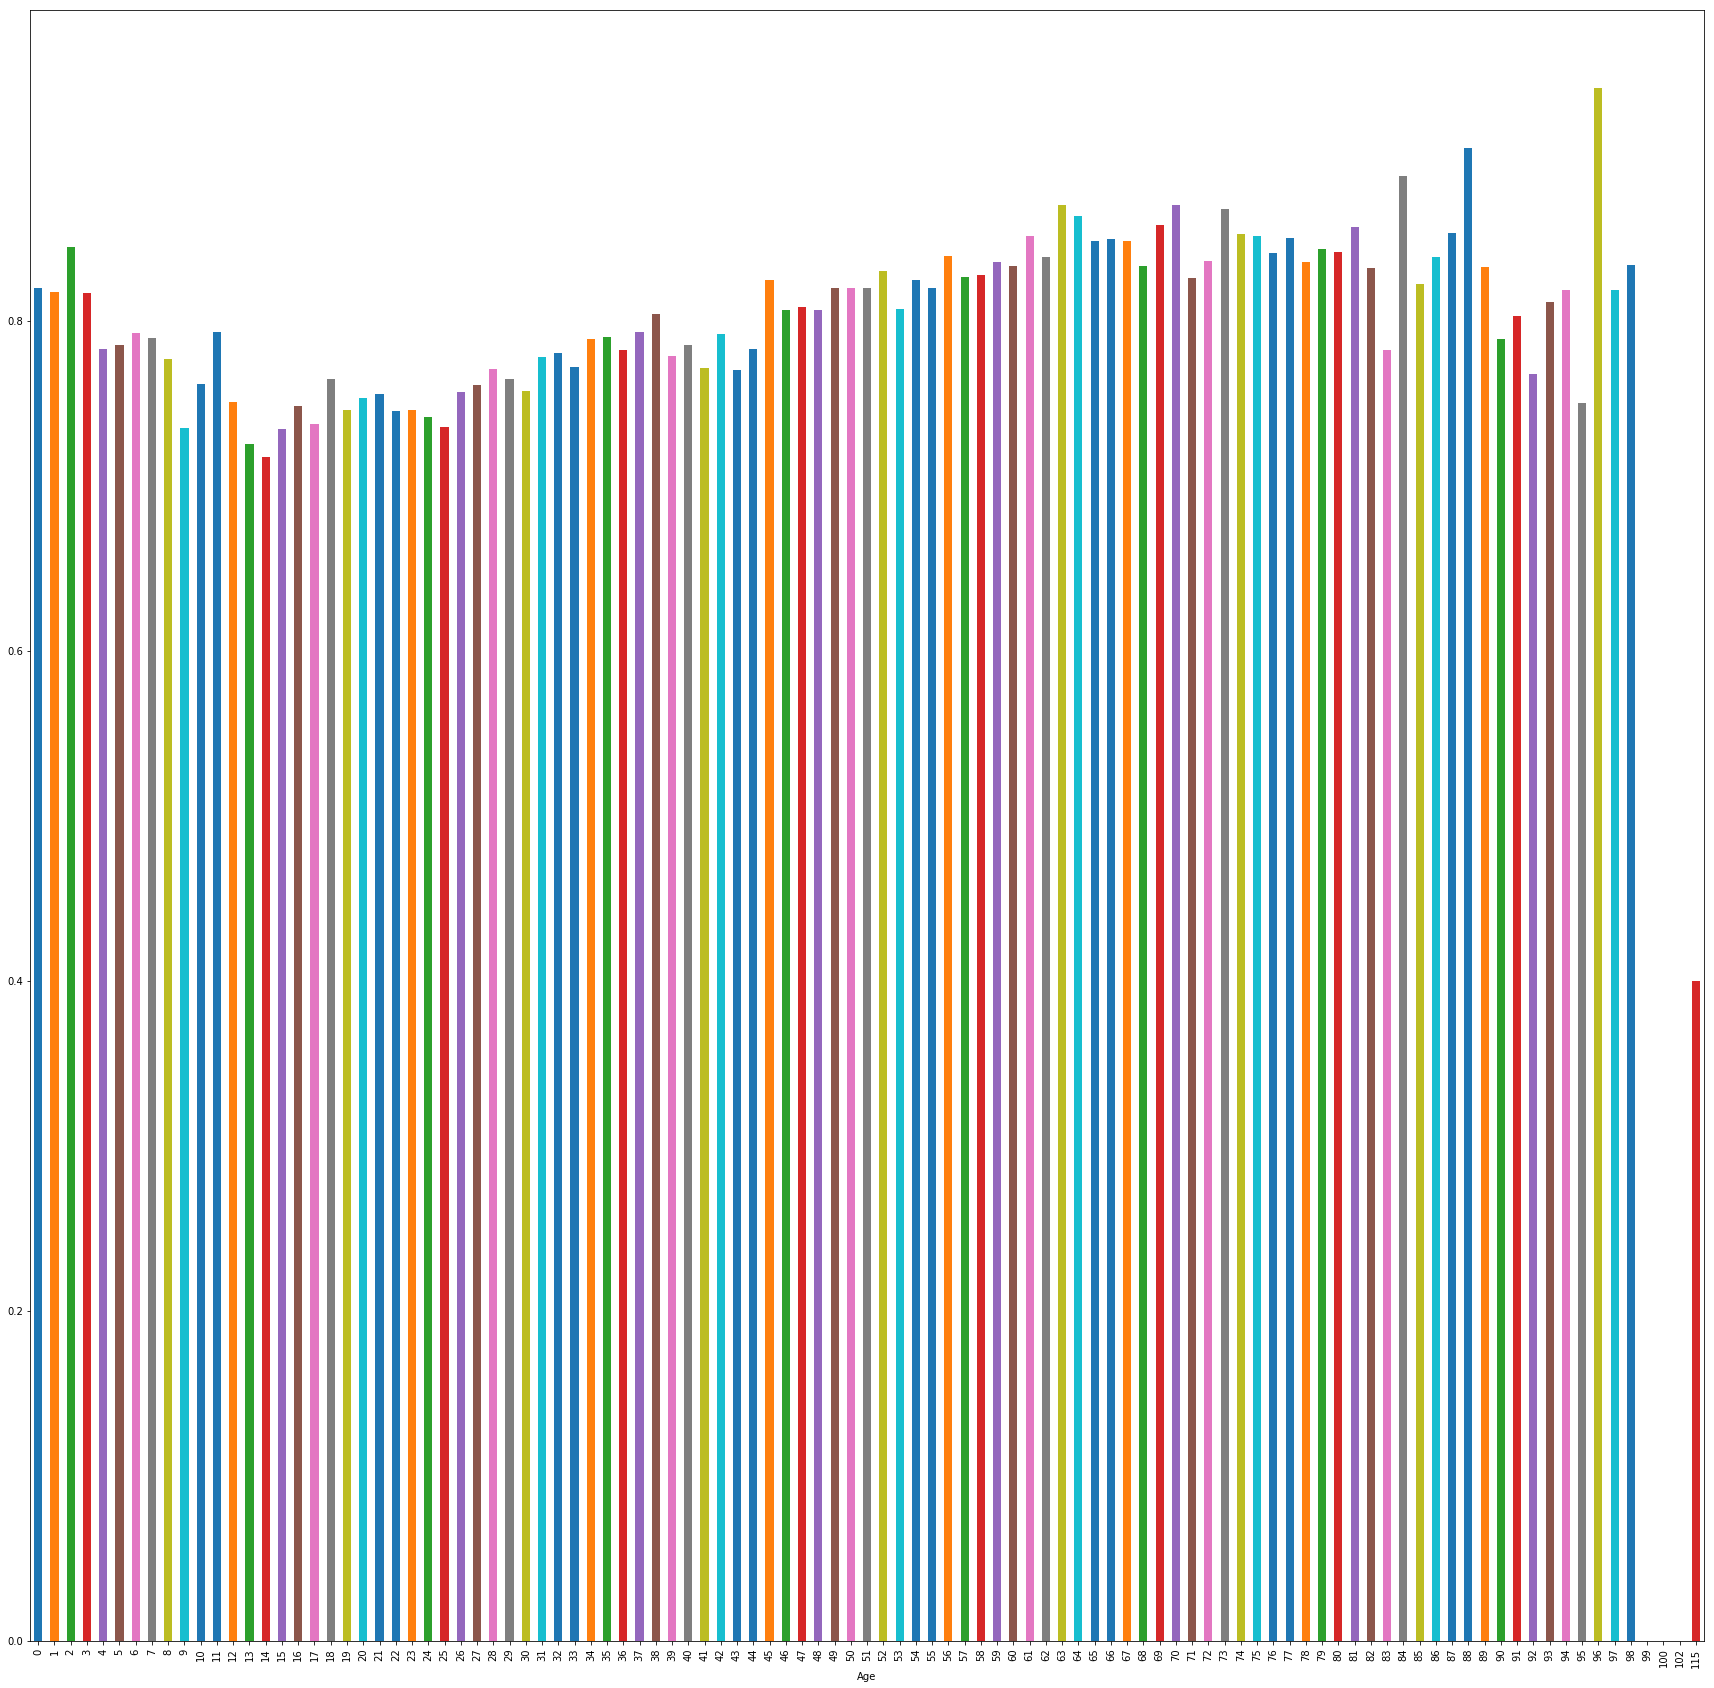

In [65]:
m.plot.bar(figsize=(30,30))

In [66]:
# kind = 'line'
desc=['0:16','17:23','24:35','36:54','55:']
start_1=[0,17,24,36,55]
end_point=[16,23,35,54,1000]
update_appo_df['Age_stage']=update_appo_df['Age']
for i in range(5):
    print(start_1[i], end_point[i],' ',desc[i])
    update_appo_df['Age_stage'][(update_appo_df['Age'] <= end_point[i]) & (update_appo_df['Age'] >=start_1[i])]=desc[i]

update_appo_df.head()


0 16   0:16
17 23   17:23


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


24 35   24:35
36 54   36:54
55 1000   55:


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays,WaitingDays_names,Age_stage
0,2.98724998243e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,same_day,55:
1,5.58997776694e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,same_day,55:
2,4.26296229995e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,same_day,55:
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,same_day,0:16
4,8.84118644818e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,same_day,55:


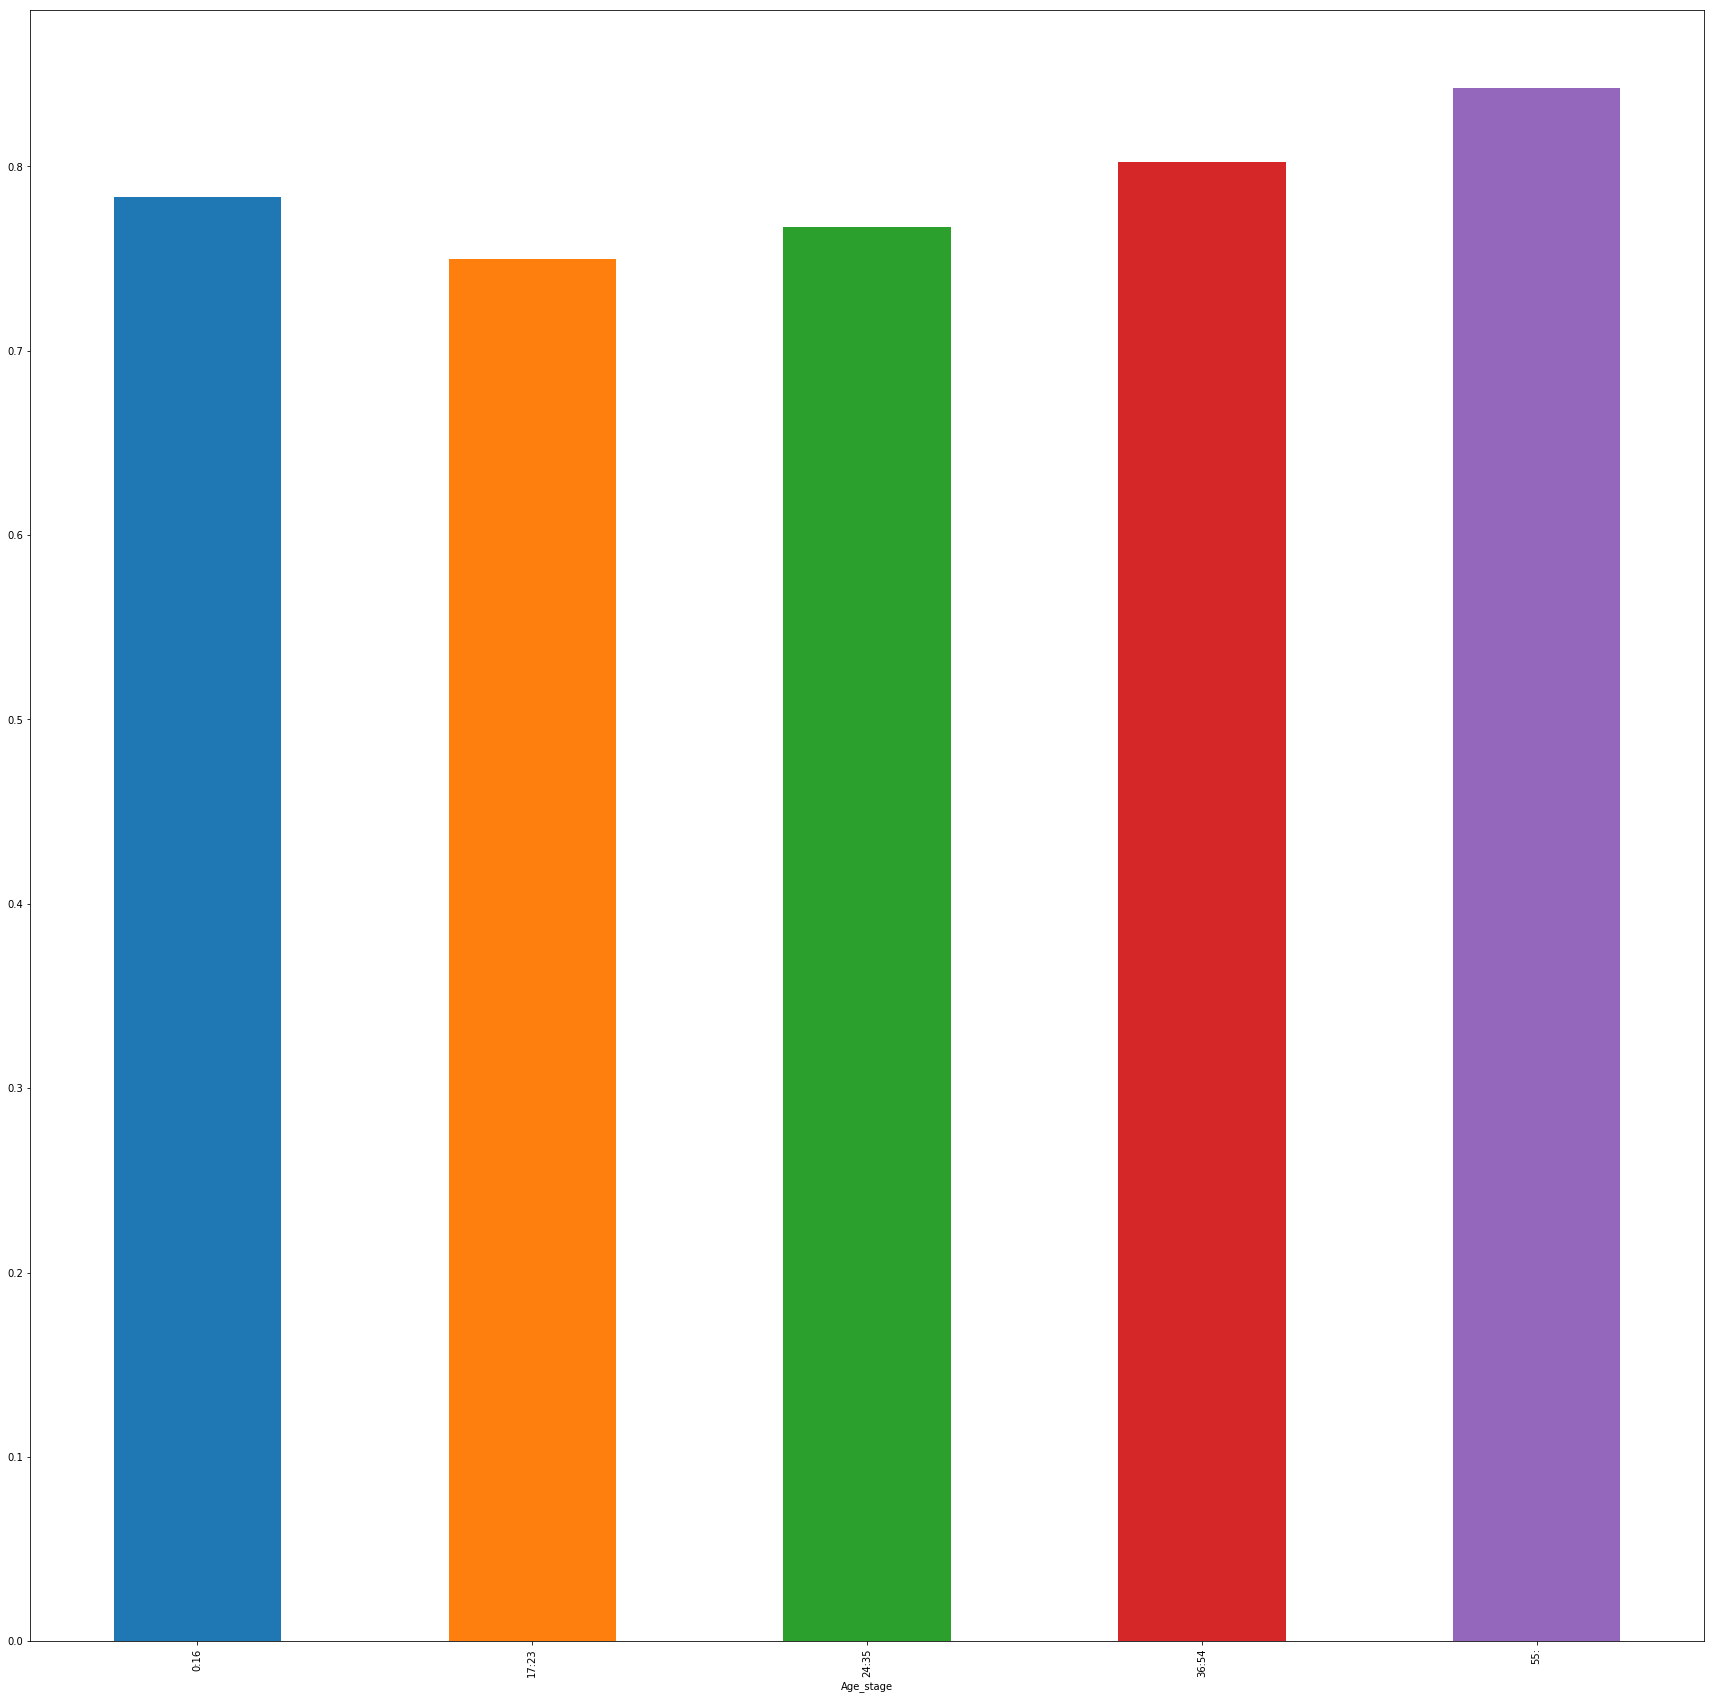

In [67]:

result_Age = update_appo_df.groupby(by=['Age_stage','No-show'])
result_Age = result_Age.count()['PatientId'].unstack()

result_Age.head()
m=result_Age['No']/(result_Age['Yes']+result_Age['No'])
m.plot.bar(figsize=(30,30))

## Scholarship

In [68]:

result_Scholarship = update_appo_df.groupby(by=['Scholarship','No-show'])
result_Scholarship = result_Scholarship.count()['PatientId'].unstack()

result_Scholarship

No-show,No,Yes
Scholarship,,
0,79924,19736
1,8283,2578


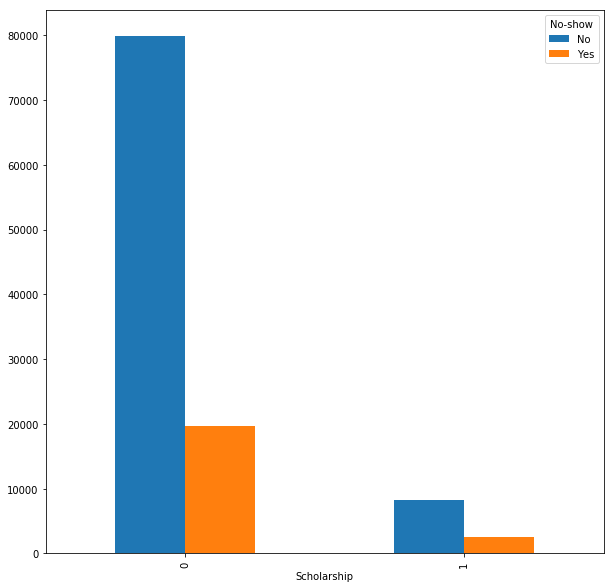

In [69]:
result_Scholarship.plot.bar(figsize=(10,10))

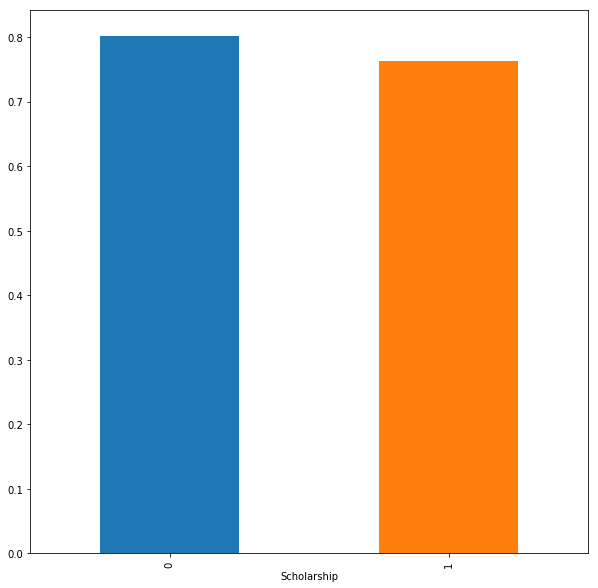

In [70]:
n=result_Scholarship['No']/(result_Scholarship['Yes']+result_Scholarship['No'])
n.plot.bar(figsize=(10,10))

In [48]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
# Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (is there is a relation between Handicapping and the attendance?)

In [49]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

results = update_appo_df.groupby(by=['Handcap','No-show'])
results = results.count()['PatientId'].unstack()

results


No-show,No,Yes
Handcap,,
0,86373,21909
1,1834,405


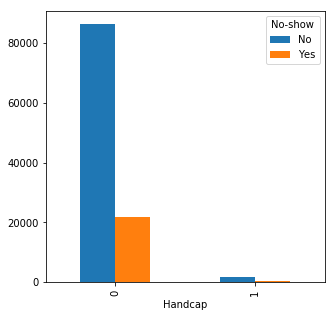

In [51]:
results.plot.bar(figsize=(5,5))

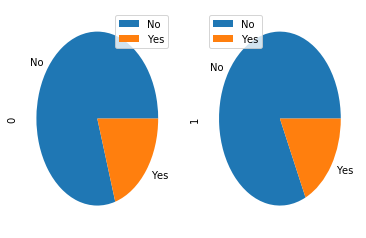

In [52]:
axes = results.T.plot.pie(rot=0, subplots=True)
axes[1].legend(loc=2)

### Research Question 2  (is there a relation between attendance and the gender ?)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [32]:
result_gender = update_appo_df.groupby(by=['Gender','No-show'])
result_gender = result_gender.count()['PatientId'].unstack()

result_gender.head()


No-show,No,Yes
Gender,,
F,57245,14591
M,30962,7723


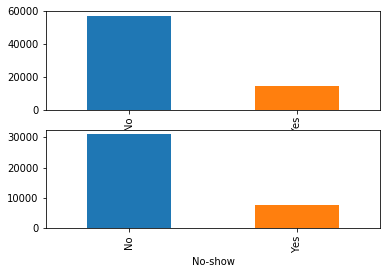

In [33]:
result_gender_T=result_gender.T
fig, axes = plt.subplots(2)
result_gender_T['F'].plot.bar(ax=axes[0])
result_gender_T['M'].plot.bar(ax=axes[1])

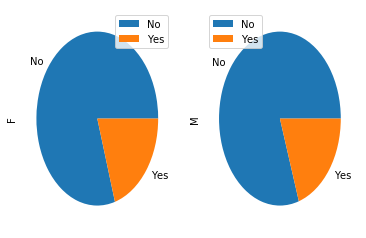

In [35]:
axes = result_gender_T.plot.pie(rot=0, subplots=True)
axes[1].legend(loc=2)

>the results show that there is no relation between gender and attendance 

### Research Question 3  (is there a relation between attendance and Neighbourhood ?)

In [36]:
result_Neighbourhood = update_appo_df.groupby(by=['Neighbourhood','No-show'])
result_Neighbourhood = result_Neighbourhood.count()['PatientId'].unstack()

result_Neighbourhood.head()

No-show,No,Yes
Neighbourhood,,
AEROPORTO,7.0,1.0
ANDORINHAS,1741.0,521.0
ANTÔNIO HONÓRIO,221.0,50.0
ARIOVALDO FAVALESSA,220.0,62.0
BARRO VERMELHO,332.0,91.0


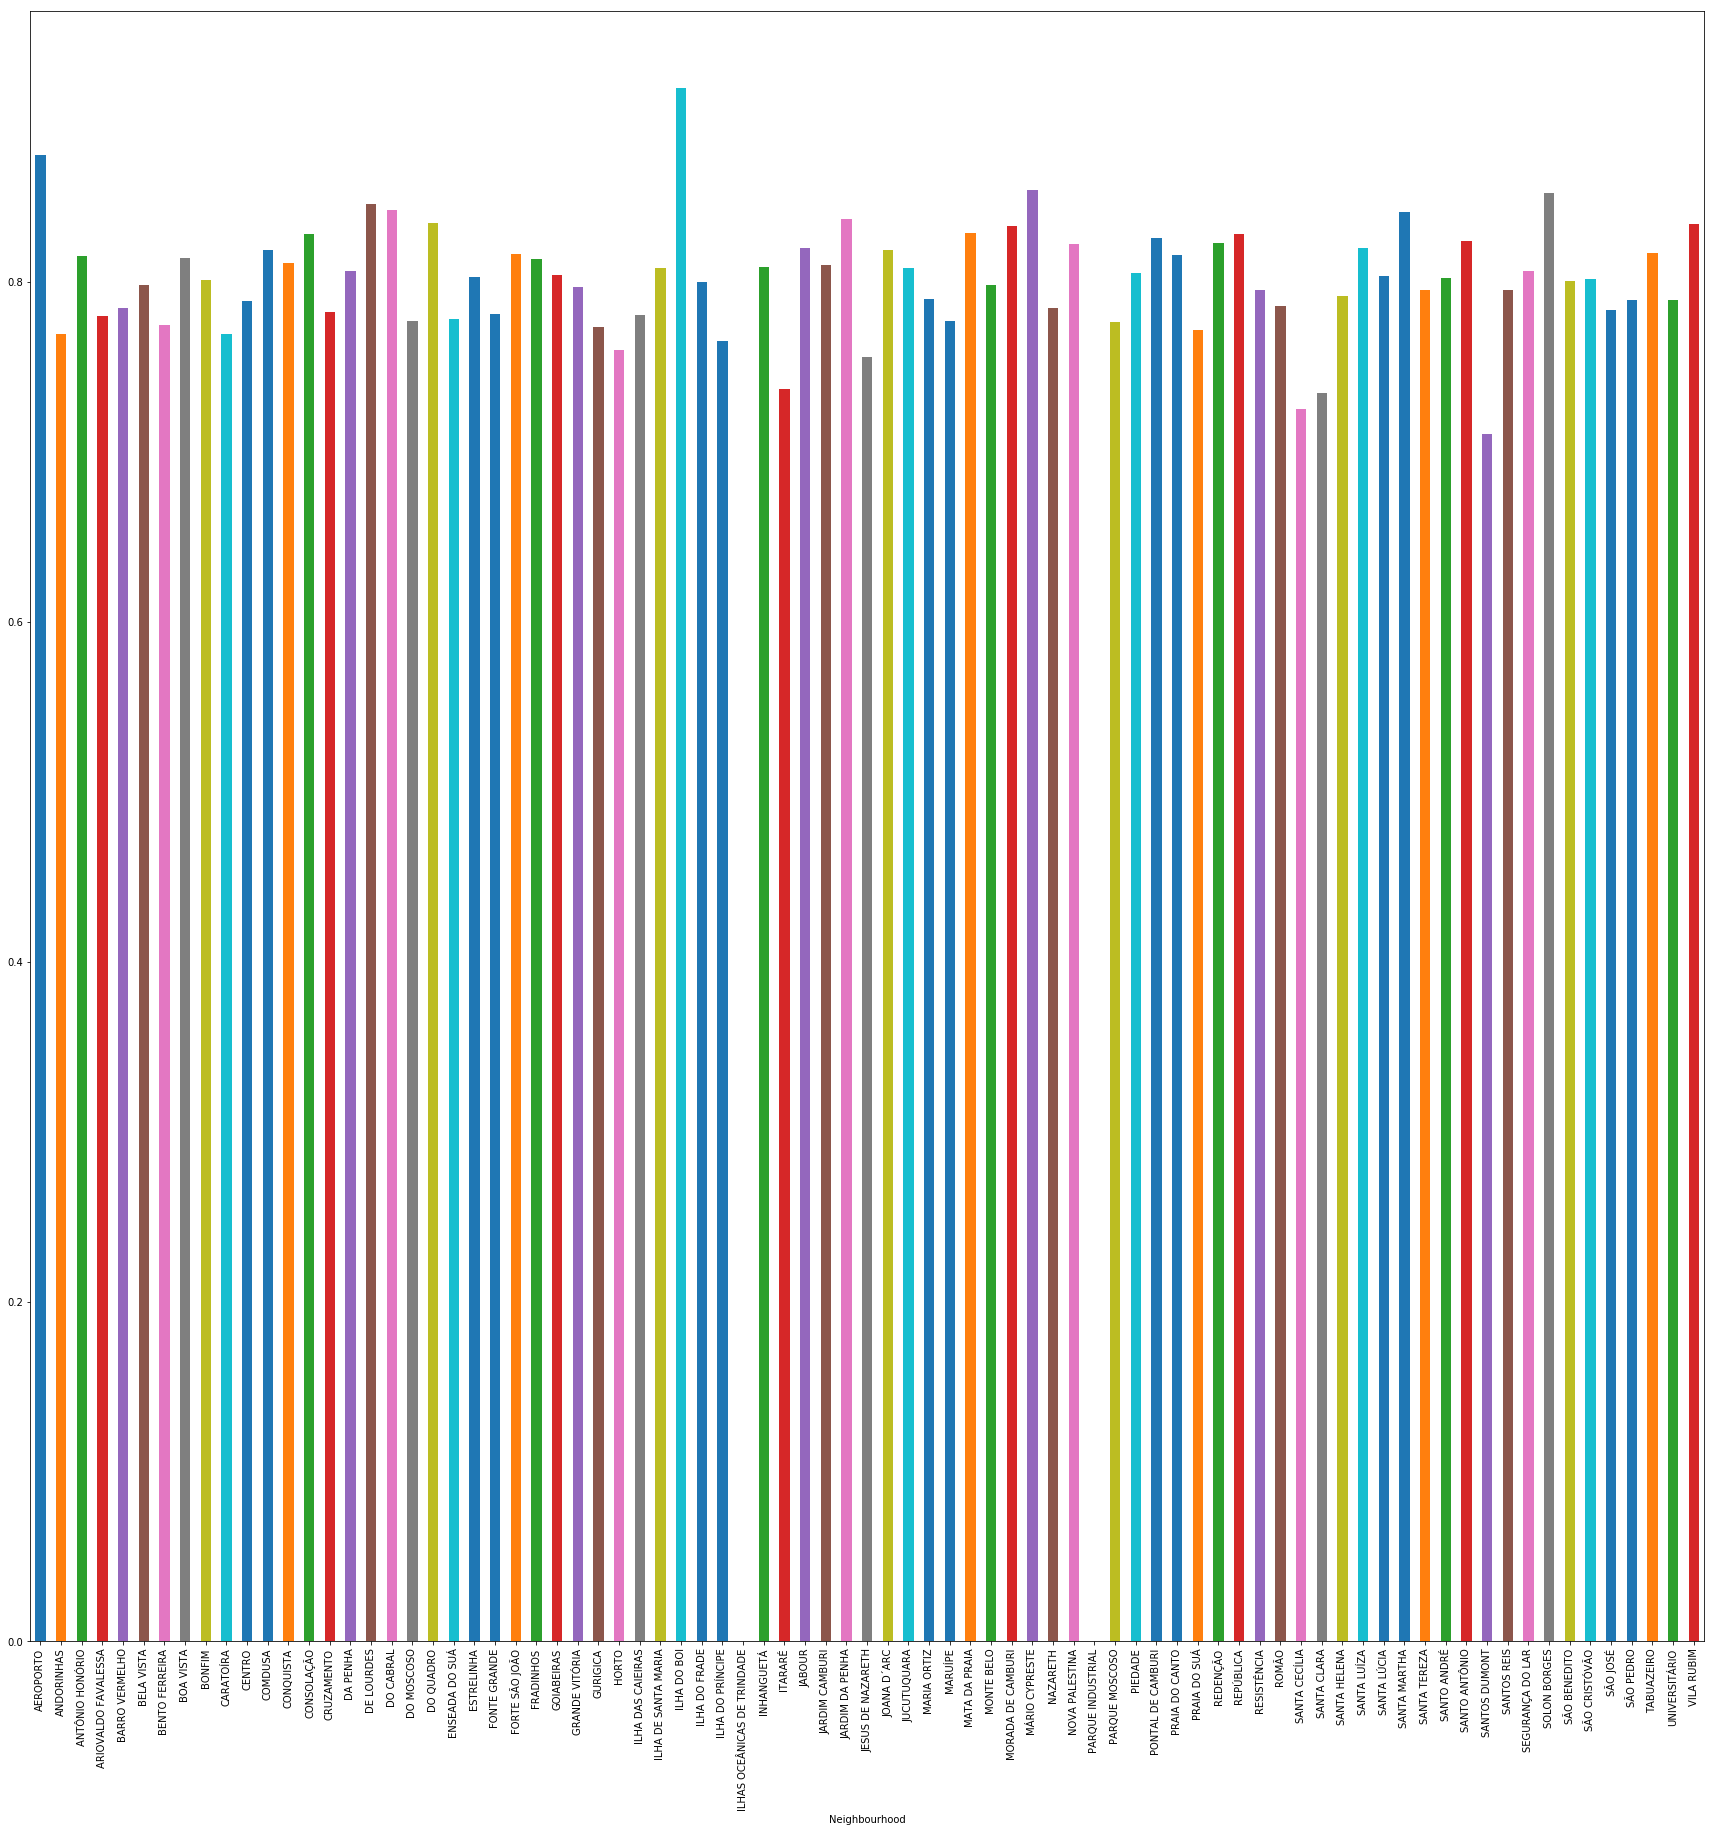

In [38]:
n=result_Neighbourhood['No']/(result_Neighbourhood['Yes']+result_Neighbourhood['No'])
n.plot.bar(figsize=(30,30))

### Research Question 4 (is there a relation between attendance and the schoolarship ?)

In [42]:

result_Scholarship = update_appo_df.groupby(by=['Scholarship','No-show'])
result_Scholarship = result_Scholarship.count()['PatientId'].unstack()

result_Scholarship.head()


No-show,No,Yes
Scholarship,,
0,79924,19736
1,8283,2578


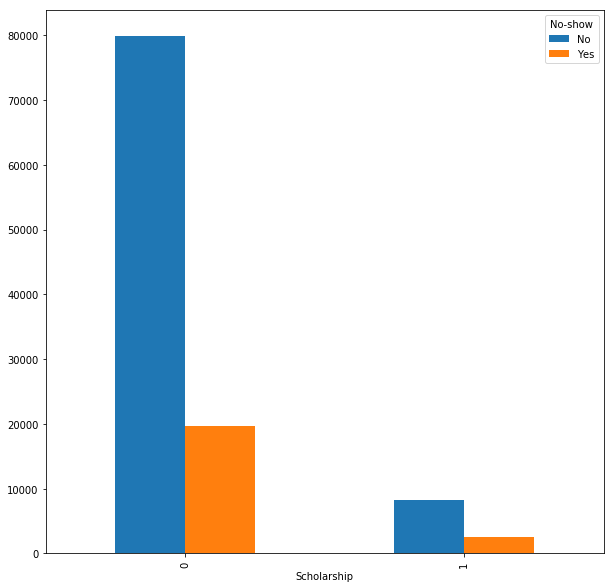

In [43]:
result_Scholarship.plot.bar(figsize=(10,10))


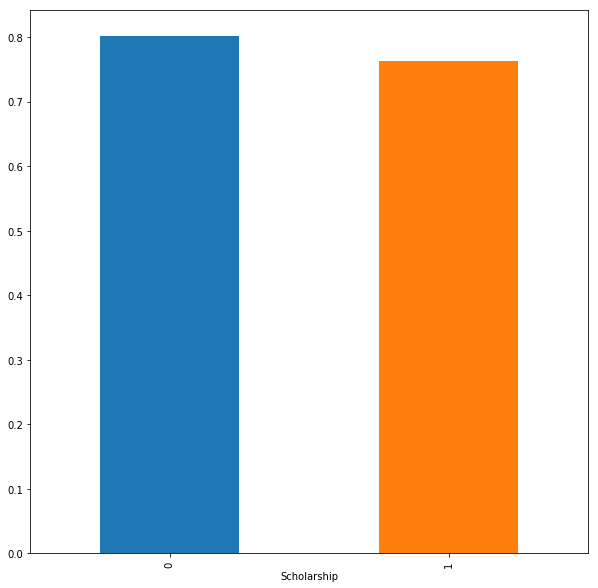

In [44]:
n=result_Scholarship['No']/(result_Scholarship['Yes']+result_Scholarship['No'])
n.plot.bar(figsize=(10,10))

>scholarship is not considered a factor with high impact  

### Research Question 5 (is there a relation between attendance and the waiting days  ?)

In [39]:
result_2 = update_appo_df.groupby(by=['WaitingDays_names','No-show'])
result_2 = result_2.count()['PatientId'].unstack()

result_2.head()

No-show,No,Yes
WaitingDays_names,,
16:30_month,10709,5159
31:60_2_months,5454,2829
61:70_long,872,340
71:_very long,627,256
8:15_half_month,9362,4166


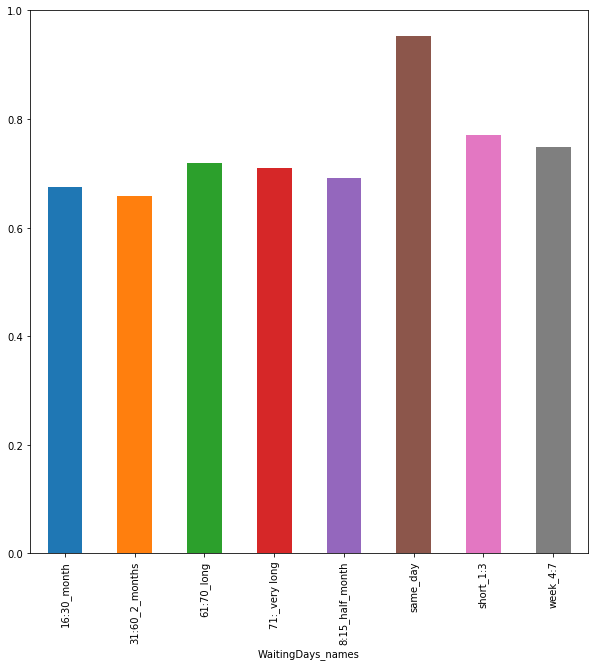

In [41]:
n=result_2['No']/(result_2['Yes']+result_2['No'])
n.plot.bar(figsize=(10,10))

### Research Question 6 (is there a relation between attendance and the SMS_received  ?) 

In [71]:
result_2 = update_appo_df.groupby(by=['SMS_received','No-show'])
result_2 = result_2.count()['PatientId'].unstack()

result_2.head()

No-show,No,Yes
SMS_received,,
0,62509,12530
1,25698,9784


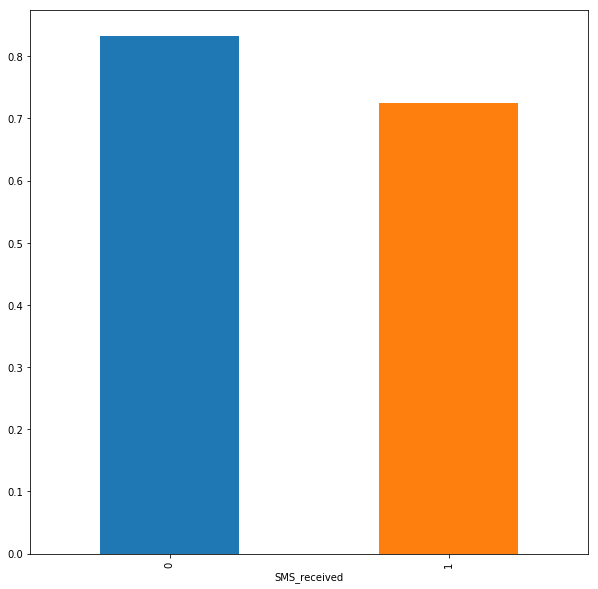

In [72]:
n=result_2['No']/(result_2['Yes']+result_2['No'])
n.plot.bar(figsize=(10,10))

### Research Question 7 (is there a relation between attendance and the Alcoholism  ?)   

In [74]:
result_2 = update_appo_df.groupby(by=['Alcoholism','No-show'])
result_2 = result_2.count()['PatientId'].unstack()

result_2.head()

No-show,No,Yes
Alcoholism,,
0,85524,21637
1,2683,677


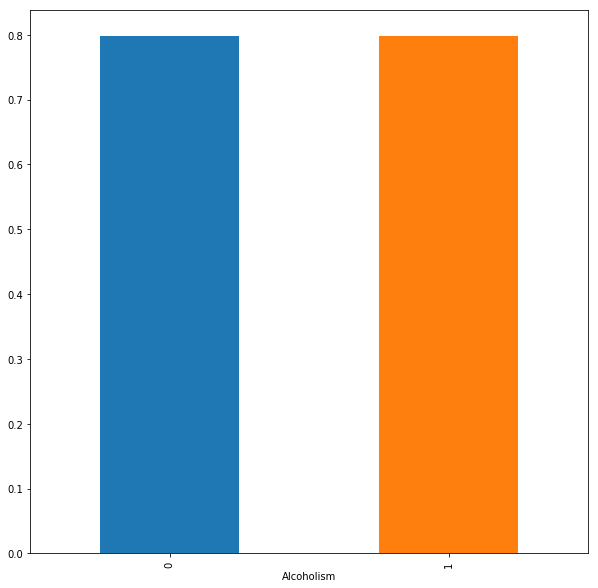

In [75]:
n=result_2['No']/(result_2['Yes']+result_2['No'])
n.plot.bar(figsize=(10,10))

### Research Question 8 (is there a relation between attendance and the Diabetes  ?)    

In [76]:
result_2 = update_appo_df.groupby(by=['Diabetes','No-show'])
result_2 = result_2.count()['PatientId'].unstack()

result_2.head()

No-show,No,Yes
Diabetes,,
0,81694,20884
1,6513,1430


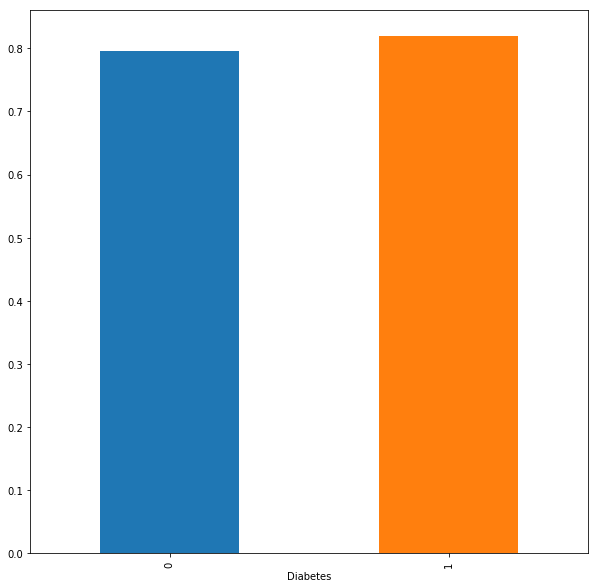

In [77]:
n=result_2['No']/(result_2['Yes']+result_2['No'])
n.plot.bar(figsize=(10,10))

>not an important feature alone too

### Research Question 9 (is there a relation between attendance and the Hipertension  ?)    

In [78]:
result_2 = update_appo_df.groupby(by=['Hipertension','No-show'])
result_2 = result_2.count()['PatientId'].unstack()

result_2.head()

No-show,No,Yes
Hipertension,,
0,70178,18542
1,18029,3772


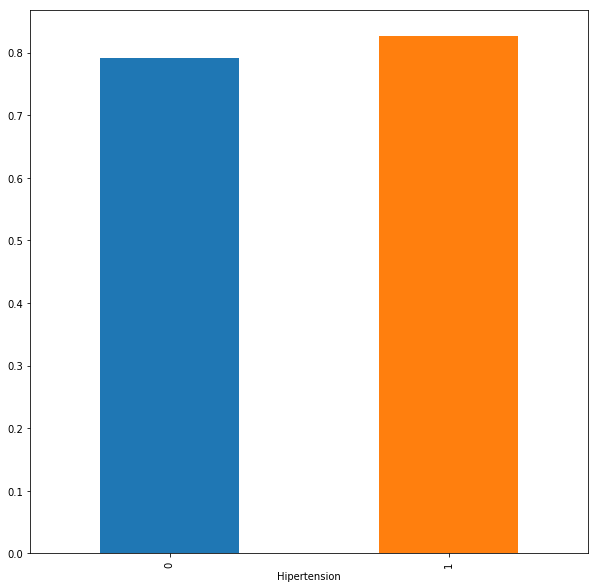

In [79]:
n=result_2['No']/(result_2['Yes']+result_2['No'])
n.plot.bar(figsize=(10,10))

>not an important feature 

https://www.kite.com/python/answers/how-to-convert-the-type-of-a-pandas-dataframe-column-from-integer-to-string-in-python#:~:text=Use%20pd.,column%20with%20column_name%20from%20a_dataframe%20.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html



<a id='conclusions'></a>
## Conclusions

> after fininshing the exploration ,I have found that ,there are a data which need to be cleaned like the age issue _ noone have a negative age _ deleting this row , then there are a needed colunens like the waiting days which I have added it , also the convert the age to subclasses 

> I have studied most of the clear relations between the features 

>I have found that the most important feature is the waiting days and the result_Neighbourhood

>the dataset contains more than 100000 appointments and about 30% of the patients have not attended which will cost a lot and will cause issues .

> **note** the dataset does not have all the important features like the temperature of the day,


In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255